In [1]:
#for output data out to the csv format
import csv
#for processing large scale data
import pandas as pd
#for matrix calculation
import numpy as np
#for machine leanring modeling
import sklearn as skl
# the library for twitter api
import tweepy




In [2]:
# credential for twitter
# Out of privacy, all the below authentications have been taken out, please contact Xuebo Lai for the information; thank you
consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
#(experiment part can be ignored)

#testing: tutorial in http://tweepy.readthedocs.io/en/v3.5.0/getting_started.html by Joshua Roesslein

#This is purely a part of testing code to print out home timeline tweets following the tutorial of tweepy

api = tweepy.API(auth)

public_tweets = api.home_timeline()


for aTwe in public_tweets:
    print (aTwe.text)
    

In [1]:
#obtain twitter data online using tweepy library (Done by Xuebo Lai)

api = tweepy.API(auth,wait_on_rate_limit=True)
#####opinion upon President Trump
# Open/Create a file to append data
csvFile = open('outcome1.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

cur = tweepy.Cursor(api.search,q="#maga",count=20000,lang="en")


for tweet in cur.items():
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.text.encode('utf-8')])


In [9]:
# experiment part (can be ignored)
# source: learn from the tutorial: https://rare-technologies.com/word2vec-tutorial/: Xuebo Lai (this part of code is abandonen due to modification of original plan)
# playing with toy corpus
import gensim
from gensim.models import Word2Vec

corpus = [['first', 'sentence'], ['second', 'sentence']]
# training corpus
model = gensim.models.Word2Vec(corpus, min_count=1,sg=1)

model.save("./modeling.python")
#awakening_model = gensim.models.Word2Vec.load('./modeling.python')
#continue training the model when there's new data arrived
#model.train(more_sentences)


In [2]:
# text Pre-processing: done by Pu Zhao
import csv
import re

def preprocessText(fileName):
    print("i'm here")
    with open(fileName,'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        with open('opinion.csv','w') as new_file:
            csv_writer = csv.writer(new_file)
            lst = []
            stop_words = {"ourselves", "hers", "between", "yourself", "but", "again", "there", "about", "once", "during", "out", "very", "having", "with", "they", "own", "an", "be", "some", "for", "do", "its", "yours", "such", "into", "of", "most", "itself", "other", "off", "is", "s", "am", "or", "who", "as", "from", "him", "each", "the", "themselves", "until", "below", "are", "we", "these", "your", "his", "through", "don", "nor", "me", "were", "her", "more", "himself", "this", "down", "should", "our", "their", "while", "above", "both", "up", "to", "ours", "had", "she", "all", "no", "when", "at", "any", "before", "them", "same", "and", "been", "have", "in", "will", "on", "does", "yourselves", "then", "that", "because", "what", "over", "why", "so", "can", "did", "not", "now", "under", "he", "you", "herself", "has", "just", "where", "too", "only", "myself", "which", "those", "i", "after", "few", "whom", "t", "being", "if", "theirs", "my", "against", "a", "by", "doing", "it", "how", "further", "was", "here", "than"}
            
            for line in csv_reader:
                insideLine = ""
               # print (line)
               # print (re.split(r'\s*', line[0]))
                line = re.split(r'\s*', line[0])
                #realSentence=False
                num = len(line)


                for x in range(0, num):
                    for currStr in line:
                        if currStr=="b'RT":
                            line.remove(currStr)
                        elif currStr.startswith( "@" ):
                            line.remove(currStr)
                        elif currStr.startswith( "http" ):
                            line.remove(currStr)
                        elif (currStr.find("\\x") != -1):
                            line.remove(currStr)
                        elif (currStr.find("http") != -1):
                            line.remove(currStr)
                        elif (currStr.find(":") != -1):
                            line.remove(currStr)
                        elif (currStr.find("-") != -1):
                            line.remove(currStr)
                        elif (currStr.find(":") != -1):
                            line.remove(currStr)
                        elif (currStr.find("\\") != -1):
                            line.remove(currStr)
                        elif currStr.startswith( "#" ):
                            line.remove(currStr)
                        elif (currStr.find("RT") != -1):
                            line.remove(currStr)
                        elif currStr.startswith( "$QQQ" ):
                            line.remove(currStr)
                        elif currStr.startswith( "$" ):
                            line.remove(currStr)
                        elif currStr.startswith( "b'" ):
                            line.remove(currStr)
                        elif currStr in stop_words:
                            line.remove(currStr)
                            
                            
                for currStr in line:
                    insideLine=insideLine+currStr+" "
                print(insideLine) 
                lst.append(insideLine)
    return lst


            

lst_whole = preprocessText('outcome1.csv')

lst_train = preprocessText('first200.csv')




In [ ]:
# using the most naive way with library bowCorpus2Vec in sklearn to build fix length matrix from sentences: (Done by Xuebo Lai)
# this way is replaced by the other way below
# building fix length matrix from sentences based on pure bag of words: Xuebo Lai
# reference:https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/


from sklearn.feature_extraction.text import CountVectorizer
corpus = lst
# initialize the model
countVec = CountVectorizer()
#train the model
countVec.fit(corpus)
bowCorpus2Vec_train = countVec.transform(lst_train)
bowCorpus2Vec_whole = countVec.transform(lst_whole)
bowSenMatrix_whole = bowCorpus2Vec_whole.toarray()
bowSenMatrix_train = bowCorpus2Vec_train.toarray()
print(bowSenMatrix)

In [110]:
#building fix length matrix from sentences based on bag of words and tfidf: (Done by Xuebo Lai)
import numpy as np
# reference:https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/
from sklearn.feature_extraction.text import TfidfVectorizer
corpus_whole = lst_whole
corpus_train = lst_train

# initialize the model
tfidfModeling = TfidfVectorizer()
# tokenize and build vocab
tfidfModeling.fit(corpus_whole)
tfidfCorpus2vector_whole = tfidfModeling.transform(corpus_whole)
tfidfCorpus2vector_train = tfidfModeling.transform(corpus_train)
# summarize encoded vector
tfidfSenMatrix_whole = tfidfCorpus2vector_whole.toarray()
tfidfSenMatrix_train = tfidfCorpus2vector_train.toarray()
print(tfidfSenMatrix_whole)
mean_whole = np.mean(tfidfSenMatrix_whole,axis = 1)
mean_train = np.mean(tfidfSenMatrix_train,axis = 1)
tfidfSenMatrix_demeaned_whole = tfidfSenMatrix_whole - mean_whole.reshape(-1, 1)
tfidfSenMatrix_demeaned_train = tfidfSenMatrix_train - mean_train.reshape(-1, 1)
#print(tfidfSenMatrix_demeaned)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [111]:
# dimension reduction using pca: (Done by Xuebo Lai)
# see how much information has been retained and then decide on how many dimensions of data we should retain
from sklearn.decomposition import PCA
#initialize the model
pca_whole = PCA(n_components=60)
pca_train = PCA(n_components=60)
matrixAfterReduction_whole = pca_whole.fit_transform(tfidfSenMatrix_demeaned_whole)
matrixAfterReduction_train = pca_train.fit_transform(tfidfSenMatrix_demeaned_train)
print(pca_train.explained_variance_ratio_)
print(matrixAfterReduction_train)
'''
when n_component = 30
[0.039846   0.03684523 0.02819726 0.02379488 0.02177815 0.02097992
 0.01843331 0.0143908  0.01361782 0.01341245 0.01275798 0.01244748
 0.01211811 0.011141   0.01099844 0.01054198 0.01020426 0.00980705
 0.00953424 0.00921104 0.00840742 0.00802079 0.007936   0.00756229
 0.00721607 0.00675032 0.00663969 0.00619519 0.00612309 0.00596416]

when n_component = 60 
[0.039846   0.03684523 0.02819726 0.02379488 0.02177815 0.02097992
 0.01843331 0.0143908  0.01361782 0.01341245 0.01275798 0.01244748
 0.01211811 0.011141   0.01099845 0.01054202 0.01020434 0.00980708
 0.00953433 0.00921117 0.00840786 0.0080215  0.00793807 0.0075651
 0.00722541 0.00676371 0.00666353 0.0062591  0.00614571 0.00597462
 0.00580688 0.00547201 0.00522128 0.00509472 0.00502346 0.00498197
 0.00479641 0.00467298 0.00459899 0.00445661 0.00444436 0.00430059
 0.00422962 0.0042204  0.00415524 0.00406495 0.00404429 0.00395383
 0.00388272 0.0037599  0.00363596 0.00353589 0.00351245 0.00349201
 0.00341183 0.00334164 0.00327173 0.00320776 0.00314606 0.00310194]
'''


[0.04168584 0.03803612 0.03539676 0.03335938 0.02388671 0.02243968
 0.02155577 0.01975771 0.01707469 0.01559297 0.01520436 0.01318052
 0.01268367 0.01186336 0.0115569  0.0114547  0.01120283 0.01101406
 0.01095675 0.01067236 0.01057865 0.01030219 0.01012935 0.00991803
 0.00972218 0.00930321 0.00904067 0.00833214 0.00804608 0.00792136
 0.0077474  0.00749406 0.00735663 0.0073079  0.00728626 0.00691539
 0.00685458 0.00673597 0.00670829 0.00648024 0.00634966 0.00628804
 0.00623    0.00614164 0.0061144  0.0060123  0.00591952 0.00587192
 0.00583273 0.00580344 0.00572062 0.00568506 0.00558285 0.00546699
 0.00543346 0.00534314 0.00533864 0.00523553 0.00521427 0.0051911 ]
[[-0.00470189  0.0400084  -0.08255441 ...  0.00687248  0.14816693
  -0.06498704]
 [-0.08793284 -0.0357589  -0.07375632 ... -0.03610073 -0.01401325
   0.03541176]
 [-0.03775174  0.09518718 -0.15378567 ...  0.00396563 -0.00021651
  -0.003419  ]
 ...
 [-0.02220152  0.04315015  0.01772628 ... -0.01037697  0.04964456
  -0.20098425]


'\nwhen n_component = 30\n[0.039846   0.03684523 0.02819726 0.02379488 0.02177815 0.02097992\n 0.01843331 0.0143908  0.01361782 0.01341245 0.01275798 0.01244748\n 0.01211811 0.011141   0.01099844 0.01054198 0.01020426 0.00980705\n 0.00953424 0.00921104 0.00840742 0.00802079 0.007936   0.00756229\n 0.00721607 0.00675032 0.00663969 0.00619519 0.00612309 0.00596416]\n\nwhen n_component = 60 \n[0.039846   0.03684523 0.02819726 0.02379488 0.02177815 0.02097992\n 0.01843331 0.0143908  0.01361782 0.01341245 0.01275798 0.01244748\n 0.01211811 0.011141   0.01099845 0.01054202 0.01020434 0.00980708\n 0.00953433 0.00921117 0.00840786 0.0080215  0.00793807 0.0075651\n 0.00722541 0.00676371 0.00666353 0.0062591  0.00614571 0.00597462\n 0.00580688 0.00547201 0.00522128 0.00509472 0.00502346 0.00498197\n 0.00479641 0.00467298 0.00459899 0.00445661 0.00444436 0.00430059\n 0.00422962 0.0042204  0.00415524 0.00406495 0.00404429 0.00395383\n 0.00388272 0.0037599  0.00363596 0.00353589 0.00351245 0.003492

In [155]:
#obtaining training data (Done by Xuebo Lai)
dataset = np.genfromtxt("./200y.csv",delimiter=",")
x_train = matrixAfterReduction_whole[0:750,:]
y_train = dataset[:750]
y_train[0] = -1
#y_train = np.append(y_train,y_train[0])
print("training")
print(x_train)
print(y_train)


training
[[ 0.03152464 -0.06086113 -0.10504067 ... -0.0097421   0.00215493
  -0.00451942]
 [ 0.04123143 -0.03199728 -0.02439005 ...  0.01821594 -0.11454616
  -0.11108634]
 [-0.02130653 -0.07433208 -0.07736242 ... -0.00060549 -0.00354132
   0.00073726]
 ...
 [-0.02928569  0.01189832 -0.0308775  ... -0.00421463 -0.01210865
   0.0014389 ]
 [-0.02057083 -0.04871224 -0.05929659 ... -0.00358009  0.02413737
  -0.03316226]
 [ 0.0035785  -0.03572513  0.03786513 ...  0.11495658 -0.15181437
  -0.22308299]]
[-1.  1. -1.  1.  1.  1.  1.  1. -1.  0. -1. -1. -1.  1. -1.  1.  1.  1.
 -1.  1. -1.  0.  1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  0.  1.
  1. -1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.
  1.  1.  1.  1.  0. -1.  1. -1.  1. -1.  1.  1.  0. -1.  1.  1.  1.  1.
 -1.  1.  1. -1.  0. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1.
 -1.  1. -1. -1.  0.  1. -1.  1.  0.  1. -1. -1.  0.  1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  0. -1.  0.  1. -1. -1.  1.  1.  1. -1. 

In [157]:
#obtaining validation data (Done by Xuebo Lai)
x_val = matrixAfterReduction_whole[750:800,:]
y_val = dataset[750:800]
print("validation")
print(x_val)
print(y_val)
#x_validation


validation
[[-4.51872065e-02 -3.49168507e-02 -1.55751113e-02 ... -7.84080332e-02
  -2.09673534e-02 -1.93456949e-02]
 [ 7.53643435e-03 -3.53967030e-02  1.76478498e-02 ... -2.23389687e-02
   1.03855240e-02  2.14610406e-02]
 [-1.42429389e-01 -2.32705008e-01  8.80875912e-01 ...  2.88724145e-03
  -3.97382115e-05  2.99527372e-03]
 ...
 [-1.94227052e-02 -8.24350215e-02  4.17046118e-02 ... -4.00435376e-02
   9.28293020e-02  1.13459369e-02]
 [-3.48571957e-02 -1.09848808e-01 -6.81942433e-02 ...  1.21963710e-03
  -9.61427624e-03  8.95600923e-03]
 [-3.94265623e-02 -3.49908719e-02  4.72304541e-02 ...  1.29682364e-03
   4.16949269e-02  1.79784318e-02]]
[ 0. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.
 -1. -1.  1. -1. -1.  0. -1. -1.  1.  0.  1. -1. -1. -1.  1.  1.  1. -1.
  0.  0. -1.  1.  1.  1.  1.  1.  1. -1.  0.  1.  0.  1.]


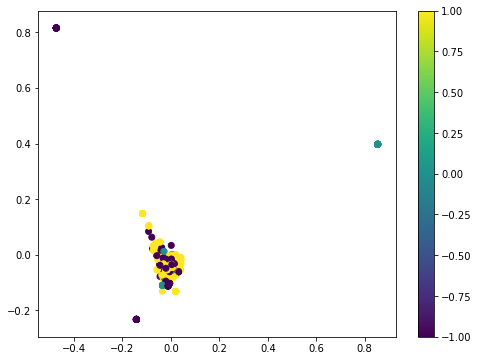

In [156]:
#using two dimensions of the data after dimension reduction to visualize data (Done by Xuebo Lai)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train)
plt.colorbar()

In [160]:
# using model logistic to train and obtain the accuracy result (Done by Xuebo Lai)
#import library
import sklearn
from sklearn.linear_model import LogisticRegression as Logistic
import numpy as np

#model 
#initialize the model
logistic = Logistic(solver='sag',multi_class="multinomial")
#training the model:
logistic.fit(x_train, y_train)

log_accuracy_emp = (np.sum(logistic.predict(x_train) == y_train))/np.float(len(y_train))
log_accuracy_val = (np.sum(logistic.predict(x_val) == y_val))/np.float(len(y_val))

print("The training accuracy for neural network is ",(log_accuracy_emp*100),"%")
print("The validation accuracy for neural network is ",(log_accuracy_val*100),"%")

491
The training accuracy for neural network is  77.2 %
The validation accuracy for neural network is  80.0 %


In [153]:
# using model neural network to train and obtain the accuracy result (Done by Xuebo Lai)
from sklearn.neural_network import MLPClassifier
import numpy as np

#model 
#initialize the model
neural_net = MLPClassifier(solver='lbfgs', alpha=0.0001,hidden_layer_sizes=(50,50))
#training the model:
neural_net.fit(x_train, y_train)

neu_accuracy_emp = (np.sum(neural_net.predict(x_train) == y_train))/np.float(len(y_train))
neu_accuracy_val = (np.sum(neural_net.predict(x_val) == y_val))/np.float(len(y_val))

print("The training accuracy for neural network is ",(neu_accuracy_emp*100),"%")
print("The validation accuracy for neural network is ",(neu_accuracy_val*100),"%")

The empirical cost for neural network is  82.66666666666667 %
The validation accuracy for neural network is  78.0 %


In [165]:
#generating statistic result (Done by Xuebo Lai)
import collections
prediction = logistic.predict(matrixAfterReduction_whole)
final_result = collections.Counter(prediction)
total_count = len(matrixAfterReduction_whole)
positive_result = final_result[1.0]
positive_percentage = (positive_result)/len(matrixAfterReduction_whole)
neutral_result = final_result[0.0]
neutral_percentage = (neutral_result)/len(matrixAfterReduction_whole)
negative_result = final_result[-1.0]
negative_percentage = (negative_result)/len(matrixAfterReduction_whole)
print("There are",(positive_percentage*100),"% of people think the tag #maga is positive. (",positive_result,"people)")
print("There are",(neutral_percentage*100),"% of people think the tag #maga is neutral. (",neutral_result,"people)")
print("There are",(negative_percentage*100),"% of people think the tag #maga is negative. (",negative_result,"people)")

There are 66.28113879003558 % of people think the tag #maga is positive. ( 11920 people)
There are 7.545596085409252 % of people think the tag #maga is neutral. ( 1357 people)
There are 26.17326512455516 % of people think the tag #maga is negative. ( 4707 people)
